## Set up

In [2]:
library("magrittr")
library("sscVis")
library("data.table")
library("R.utils")
library("ggpubr")
library("ggplot2")
library("plyr")
library("grid")
library(dplyr)
source("./func.R")

## Read data

The data is processed with the following steps:
- select genes you want to display: genes of interest
- set gene group (cytokines, pathways, etc), as a seperate columne
- set limit for both ends: if comb.ES > 0.5, then = 0.5; if < -0.25, then = -0.25 

The data below has been already processed.

In [3]:
data = read.csv("test.csv") #to save csv: write.csv(gene.plot.tb,"test.csv", row.names = FALSE)

In [4]:
data

geneID,geneSymbol,meta.cluster,cluster.name,comb.ES,comb.p,comb.padj,comb.ES.rank,comb.positive.freq,cancerType.sig.N,⋯,geneSet.cytokine,geneSet.cytokineReceptor,geneSet.chemokine,geneSet.chemokineReceptor,geneSet.CD.molecular,comb.ES.sd,y,x,ES,Group
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
CCR7,CCR7,CD8.c01.Tn.MAL,CD8.c01(Tn),1.736280523,3.311906e-51,5.063345e-49,1,0.628864712,19,⋯,FALSE,TRUE,FALSE,TRUE,TRUE,0.115346422,CCR7,CD8.c01(Tn),0.500000000,Tn
LEF1,LEF1,CD8.c01.Tn.MAL,CD8.c01(Tn),1.562154123,1.618278e-46,1.574411e-44,2,0.469789170,19,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,0.109081519,LEF1,CD8.c01(Tn),0.500000000,Tn
SELL,SELL,CD8.c01.Tn.MAL,CD8.c01(Tn),1.444960429,3.860626e-54,6.683424e-52,3,0.569365050,19,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,0.093264623,SELL,CD8.c01(Tn),0.500000000,Tn
MAL,MAL,CD8.c01.Tn.MAL,CD8.c01(Tn),1.141787762,6.718976e-28,1.686477e-26,4,0.257667957,18,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,0.104282437,MAL,CD8.c01(Tn),0.500000000,Tn
IL7R,IL7R,CD8.c01.Tn.MAL,CD8.c01(Tn),1.111834706,2.635867e-58,6.332536e-56,5,0.807363698,18,⋯,FALSE,TRUE,FALSE,FALSE,TRUE,0.069066739,IL7R,CD8.c01(Tn),0.500000000,Tcm
TCF7,TCF7,CD8.c01.Tn.MAL,CD8.c01(Tn),0.986589562,7.536893e-32,2.632769e-30,9,0.513246051,18,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,0.084004406,TCF7,CD8.c01(Tn),0.500000000,Tn
TXK,TXK,CD8.c01.Tn.MAL,CD8.c01(Tn),0.646236895,3.441939e-19,4.130327e-18,60,0.234986785,12,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,0.072176518,TXK,CD8.c01(Tn),0.500000000,NKT
GPR183,GPR183,CD8.c01.Tn.MAL,CD8.c01(Tn),0.424751760,1.731476e-13,1.225672e-12,125,0.418894831,12,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,0.057647819,GPR183,CD8.c01(Tn),0.424751760,Tcm
CD28,CD28,CD8.c01.Tn.MAL,CD8.c01(Tn),0.272121437,8.481866e-13,5.634792e-12,203,0.291966316,8,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,0.038042267,CD28,CD8.c01(Tn),0.272121437,Tem


## Plot

Can adjust figure size in first line: width & height

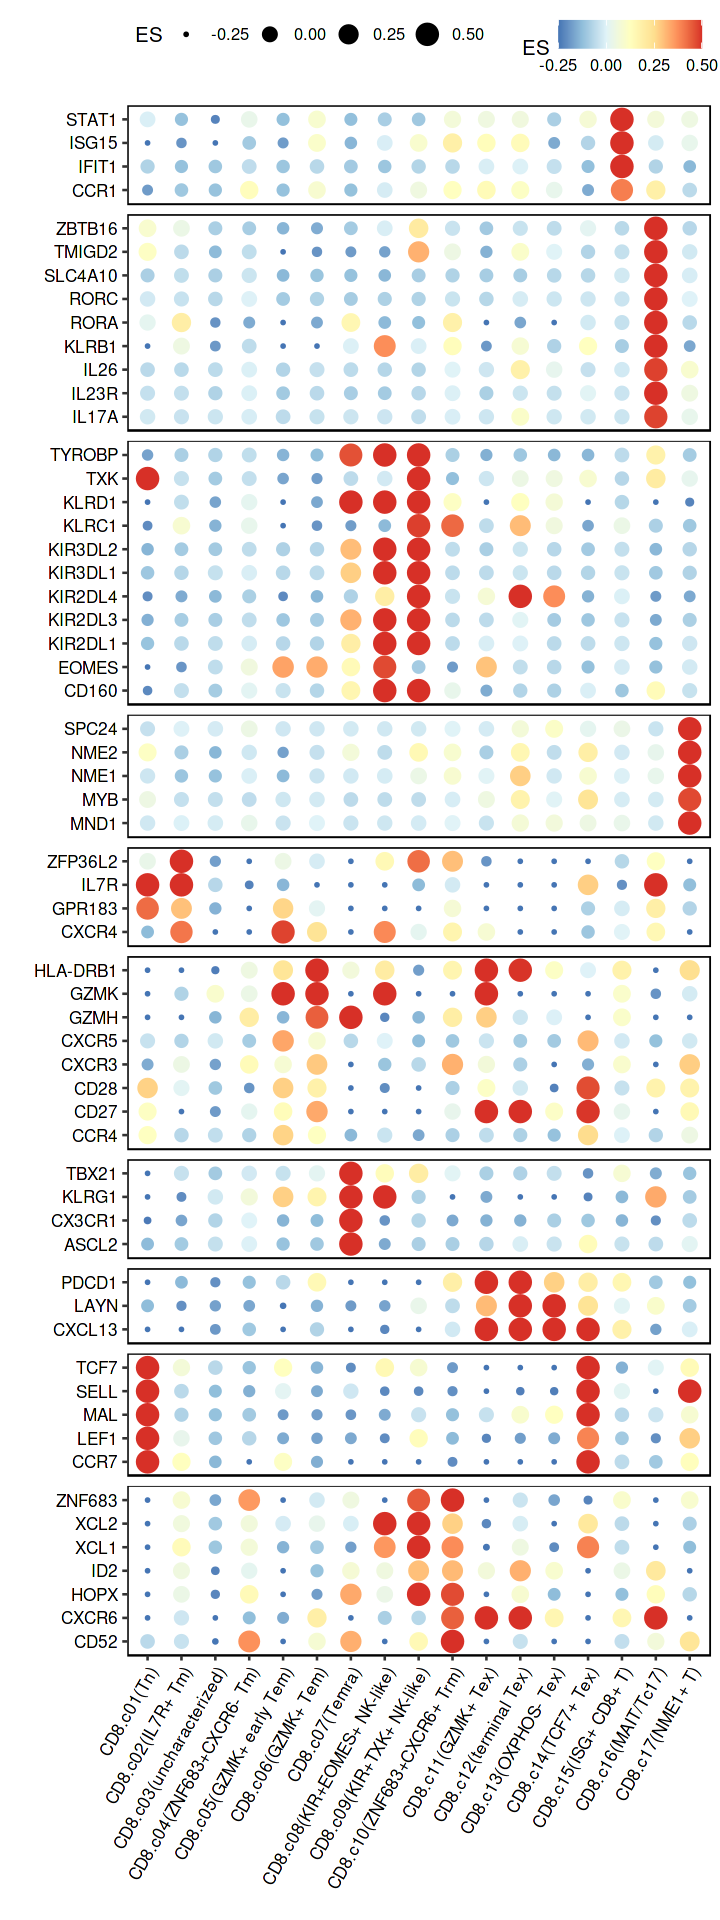

In [5]:
options(repr.plot.width=6, repr.plot.height=16) 
ggplot(data,aes(cluster.name,geneID)) +
        geom_point(aes(size=ES,color=ES),shape=16) +
        facet_grid(Group ~ ., scales = "free", space = "free") +
        scale_colour_distiller(palette = "RdYlBu") +
        labs(x="",y="") +
        theme_pubr() + #theme_void() if vertical legend
        theme(strip.text.y = element_blank(),
              axis.line.x=element_blank(),
              axis.line.y=element_blank(),
              panel.background = element_rect(colour = "black", fill = "white"),
              axis.text.y = element_text(size=10),
              axis.text.x = element_text(angle = 60,size=10, hjust = 1))

## Save pdf

In [ ]:
ggsave("Figure1/Dotplot.pdf",width=6,height=16,useDingbats=F)